In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
negativeQuestions = ["[I dislike singing]", "[I do not find karaoke amusing]", "[The time goes very slow when I do karaoke]", "[I feel bored]", "[I prefer karaoke without any effects]", "[I quickly get exhausted by new technologies]", "[I do not like karaoke]"]

def reverse(s):
    out = [5 - int(item) + 1 for item in s]
    return out

def adjust(dataframe):
    dataframe.replace({ "Completely agree" : 5,
                        "Somewhat agree" : 4,
                        "Neutral" : 3,
                        "Somewhat disagree" : 2,
                        "Completely disagree" : 1 }, inplace=True)

    dataframe.drop(columns=["Timestamp"], inplace=True)
    
    dataframe[negativeQuestions] = dataframe[negativeQuestions].apply(reverse)

    renameDict = {index : dataframe["Name"][index] for index in range(len(dataframe["Name"]))}
    dataframe = dataframe.rename(index=renameDict).drop(columns=["Name"])
    
    return dataframe

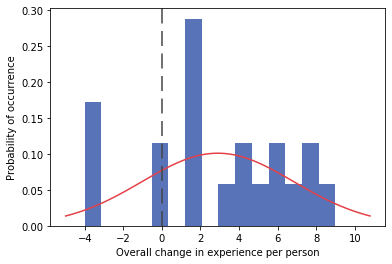

In [3]:
resWithout = pd.read_excel("results.xlsx", "without")
resWith = pd.read_excel("results.xlsx", "with")

resWithout, resWith = (adjust(resWithout), adjust(resWith))

differences = resWith.sum(axis=1) - resWithout.sum(axis=1)
differences.drop(["Bianka", "Christian"], inplace=True)

mu = differences.mean()
variance = differences.var()
sigma = differences.std()
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="#E44047")
plt.axvline(x=0, color="#444444").set_dashes([10, 5])
plt.hist(differences, density=True, bins=15, color="#5873B8")
plt.xlabel("Overall change in experience per person")
plt.ylabel("Probability of occurrence")
plt.show()

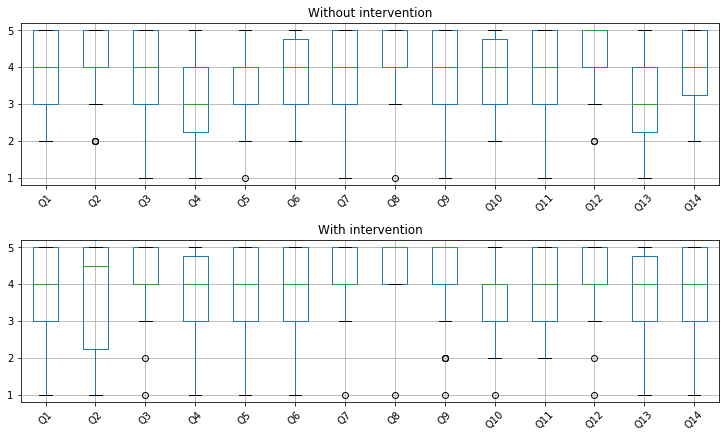

In [124]:
fig, axes = plt.subplots(2, figsize=(10, 6))

renameDict = {resWithout.columns[i] : "Q" + str(i+1) for i in range(len(resWithout.columns))}
withoutBoxplot = resWithout.rename(columns=renameDict).boxplot(rot=45, ax=axes.flatten()[0])
withoutBoxplot.set_title("Without intervention")

renameDict = {resWith.columns[i] : "Q" + str(i+1) for i in range(len(resWith.columns))}
withBoxplot = resWith.rename(columns=renameDict).boxplot(rot=45, ax=axes.flatten()[1])
withBoxplot.set_title("With intervention")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.show()

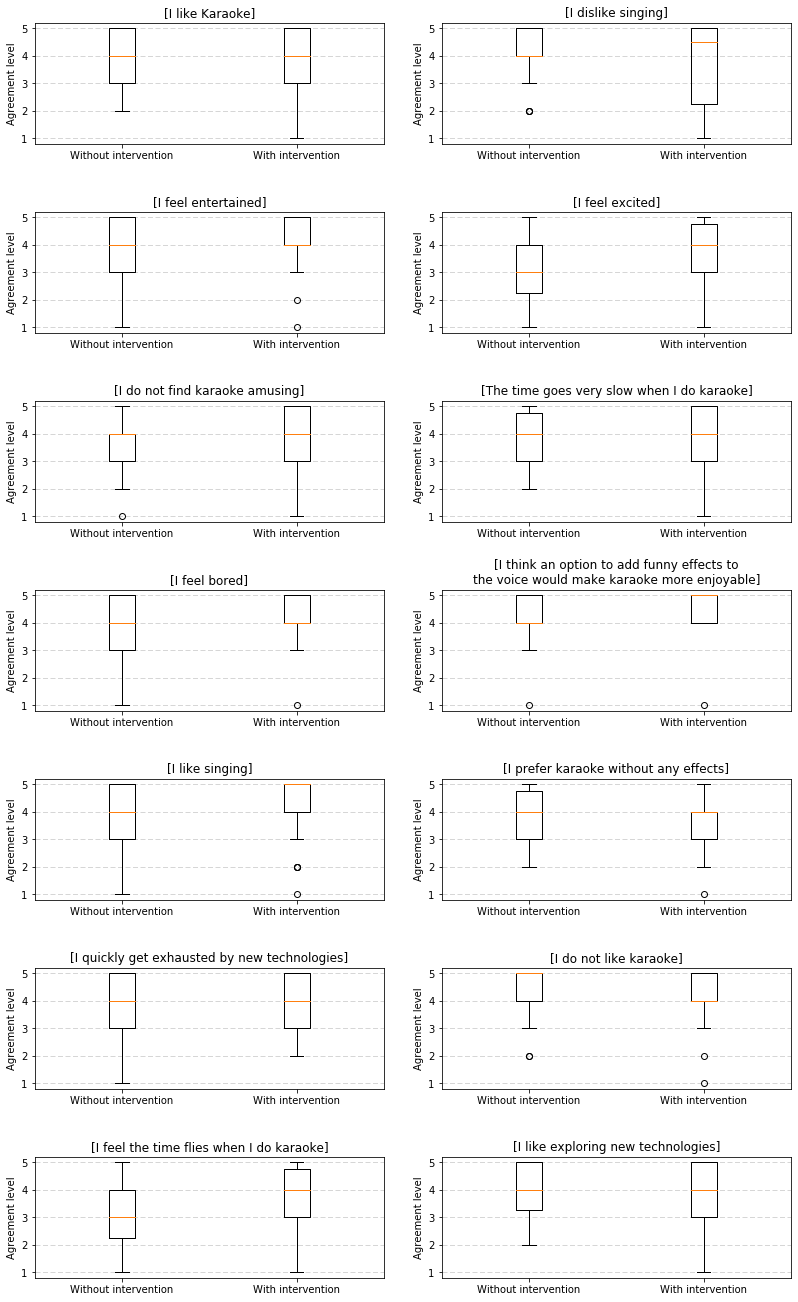

In [141]:
questionBoxplots = []

for i in range(resWith.shape[1]):
    a = pd.DataFrame()
    a['Without'] = resWithout[resWithout.columns[i]]
    a['With'] = resWith[resWith.columns[i]]
    questionBoxplots.append(a)

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(11, 18))

for i in range(len(questionBoxplots)//2):
    for j in range(2):        
        axes[i][j].axhline(1, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)
        axes[i][j].axhline(2, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)
        axes[i][j].axhline(3, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)
        axes[i][j].axhline(4, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)
        axes[i][j].axhline(5, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)

        axes[i][j].boxplot(questionBoxplots[i*2+j].transpose())
        axes[i][j].set(ylabel="Agreement level", xticklabels=["Without intervention", "With intervention"])

        axes[i][j].set_title(resWith.columns[i*2+j] if i*2+j != 7 else "[I think an option to add funny effects to\nthe voice would make karaoke more enjoyable]")
        plt.tight_layout(pad=0.4, w_pad=3.0, h_pad=2.0)

fig.show()